<a href="https://colab.research.google.com/github/AndreVelasques7/inteligencia_computacional/blob/main/at-05/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

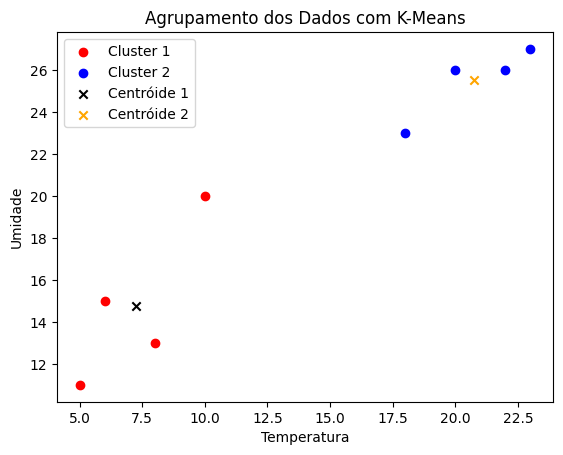

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada com atributos Temperatura, Umidade e Classe
data_points = np.array([
    [10, 20, 1], [8, 13, 0], [6, 15, 1],
    [5, 11, 1], [20, 26, 0], [22, 26, 0],
    [23, 27, 1], [18, 23, 0]
])

# Inicialização dos centróides
centroid_1 = np.array([5, 10, 0])
centroid_2 = np.array([25, 20, 1])

# Cálculo da distância euclidiana entre dois pontos
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Inicialização dos clusters
cluster_1 = []
cluster_2 = []

# Número máximo de iterações para evitar loops infinitos
max_iterations = 100

for _ in range(max_iterations):
    prev_centroid_1 = centroid_1.copy()
    prev_centroid_2 = centroid_2.copy()

    cluster_1.clear()
    cluster_2.clear()

    # Atribuição de cada ponto ao cluster com o centróide mais próximo
    for point in data_points:
        if euclidean_distance(point[:2], centroid_1[:2]) < euclidean_distance(point[:2], centroid_2[:2]):
            cluster_1.append(point)
        else:
            cluster_2.append(point)

    # Atualização dos centróides para a média dos pontos do cluster
    if cluster_1:
        centroid_1 = np.mean(cluster_1, axis=0)
    if cluster_2:
        centroid_2 = np.mean(cluster_2, axis=0)

    # Verifica se os centróides permanecem os mesmos (condição de parada)
    if np.array_equal(centroid_1, prev_centroid_1) and np.array_equal(centroid_2, prev_centroid_2):
        break

# Conversão dos clusters para numpy arrays para facilitar a plotagem
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)

# Plotagem dos clusters e seus centróides
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2')
plt.scatter(centroid_1[0], centroid_1[1], color='black', marker='x', label='Centróide 1')
plt.scatter(centroid_2[0], centroid_2[1], color='orange', marker='x', label='Centróide 2')

plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend()
plt.title('Agrupamento dos Dados com K-Means')

plt.show()
